In [1]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pentas import Pentas

%matplotlib inline

In [2]:
plt.rcParams.update({
                    'font.family': 'sans-serif',
                    'font.sans-serif': 'Helvetica',
                    'text.usetex': True,
#                     'lines.linewidth': 5,
                     'font.size': 22,
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'axes.labelsize': 'medium',
                     'axes.titlesize': 'medium',
                     'axes.grid.axis': 'both',
                     'axes.grid.which': 'both',
                     'axes.grid': True,
                     'grid.color': 'xkcd:Charcoal',
                     'grid.alpha': 0.253,
                     'lines.markersize': 8,
                     'legend.borderpad': 0.2,
#                     'legend.fancybox': True,
                     'legend.fontsize': 'medium',
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.33,
                     'legend.loc': 'best',
                     'figure.figsize': (14, 10),
                     'savefig.dpi': 140,
                     'pdf.compression': 9})

In [3]:
fname_list = glob.glob('./log/*.log')
fname_list.sort()

In [4]:
p=Pentas.init_new_game()

In [5]:
score=[]
turn=[]
for log_fname in fname_list:
    print(log_fname)
    fp = open(log_fname,'rb')
    turns=pickle.load(fp)
    fp.close()
    for turn_num in range(len(turns)-1):
        p=turns
        #Pentas.display_board(p,turn_num,turns[turn_num]['placement'])
        #print('')
    #Pentas.display_board(p)
    #print('')
    score.append(turns[-1]['score'])
    turn.append(turns[-1]['turn'])

./log/20211011-001818.log
./log/20211011-002802.log
./log/20211011-003352.log
./log/20211011-004749.log
./log/20211011-004847.log
./log/20211011-005527.log
./log/20211011-005829.log
./log/20211011-005940.log
./log/20211011-010150.log
./log/20211011-010300.log
./log/20211011-010508.log
./log/20211011-010919.log
./log/20211011-011904.log
./log/20211011-012457.log
./log/20211011-012638.log
./log/20211011-014530.log
./log/20211011-015828.log
./log/20211011-020004.log
./log/20211011-022949.log
./log/20211011-024520.log
./log/20211011-030328.log
./log/20211011-032314.log
./log/20211011-032651.log
./log/20211011-033430.log
./log/20211011-034016.log
./log/20211011-034100.log
./log/20211011-034406.log
./log/20211011-035105.log
./log/20211011-040038.log
./log/20211011-040804.log
./log/20211011-041647.log
./log/20211011-042128.log
./log/20211011-043237.log
./log/20211011-044611.log
./log/20211011-045328.log
./log/20211011-045546.log
./log/20211011-051417.log
./log/20211011-051644.log
./log/202110

In [6]:
Pentas.display_board(p)

  0 1 2 3 4 5 6 7  current     next      
0 █ █ █ █ ░ ░ ░ ░  █           █         
1 █ ░ ░ ░ ░ ░ ░ █  █ █ █       █ █       
2 ░ ░ ░ ░ ░ ░ ░ █  █             █ █     
3 ░ ░ ░ ░ ░ ░ █ █
4 ░ ░ ░ ░ ░ ░ █ █
5 █ ░ ░ ░ ░ ░ ░ ░  Turn: 181
6 ░ ░ ░ █ ░ ░ ░ ░  Score: 1761
7 ░ █ ░ ░ ░ ░ ░ █  Lines: 107


In [7]:
[len(score),np.max(score),np.mean(score),np.std(score,ddof=1)]

[118, 10690, 2139.64406779661, 1879.372415368564]

In [8]:
print(sum(turn[1:]))

25732


(0.0, 120.0)

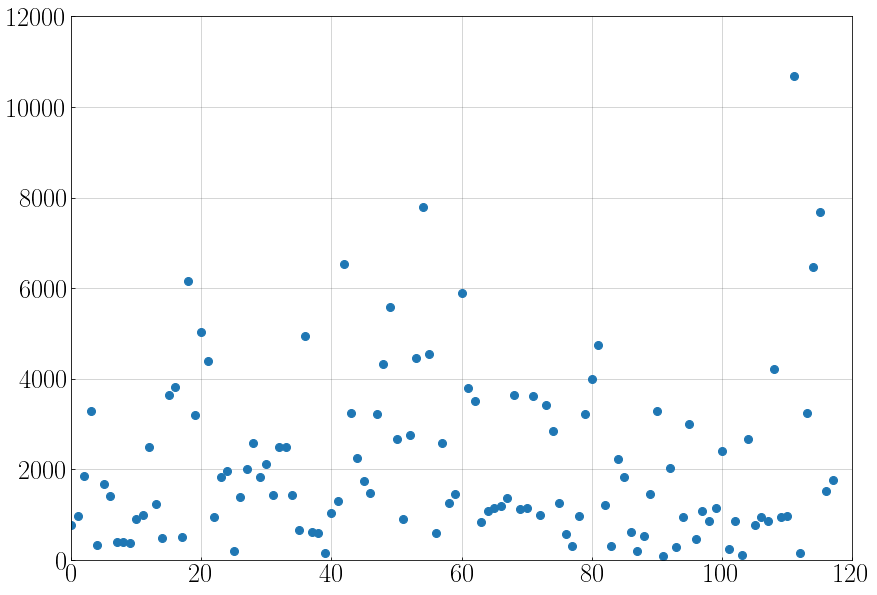

In [9]:
fig, ax = plt.subplots(1)
ax.plot(score,'o')
ax.grid('on')
ax.set_ylim([0,12000])
ax.set_xlim([0,120])

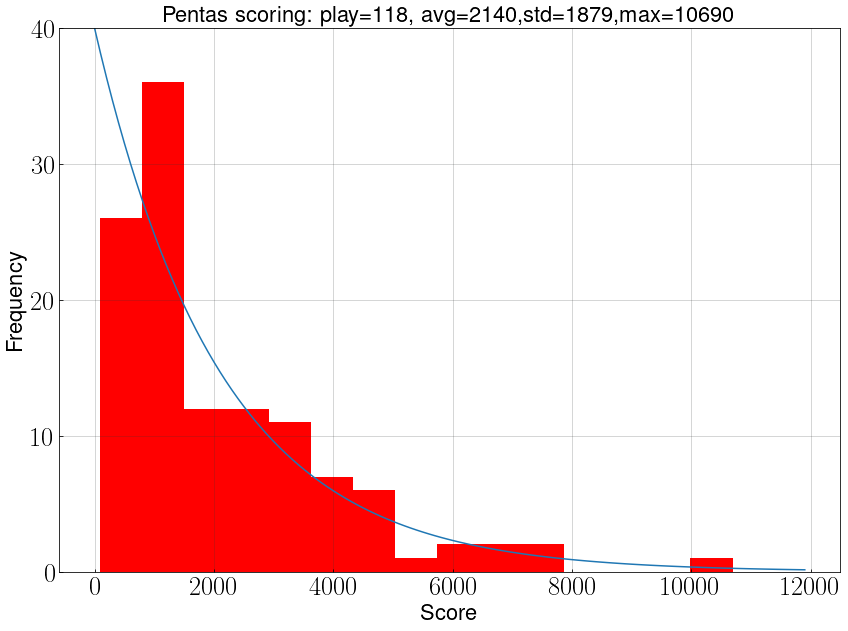

In [10]:
n, bins, patches = plt.hist(x=score, bins=15, color='#ff0000')
x=np.arange(0,12000,100)+1
plt.plot(x,40*np.exp(-x/2100))
plt.grid('on')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Pentas scoring: play={play}, avg={avg:.0f},std={std:.0f},max={max:.0f}'.format(play=len(score),avg=np.mean(score),std=np.std(score,ddof=1),max=np.max(score)))
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim([0,40])
plt.yticks([0,10,20,30,40])

plt.savefig('./hist.png', bbox_inches='tight')